In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000

In [8]:
# Bunch of units

GM_sun = 1.3271244*1e20
c =2.9979246*1e8
M_sun =1.9884099*1e30
G = 6.6743*1e-11
pc= 3.0856776*1e16
pi = np.pi
Mpc = 10**6 * pc

In [9]:
def htilde_GR(f,eps,params):
    
    """
    Here we calculate a TaylorF2 model up to 2PN which takes as input the following
    set of parameters: (log of chirp mass, symmetric mass ratio, beta).
    This can easily be changed in the first few lines where the parameters are loaded.
    The main reference is https://arxiv.org/pdf/gr-qc/0509116.pdf [Eqs (3.4)].
    
    Note on spin: 
    
    The spin parameter beta is defined in Eq.(2.3a) in [arxiv:0411129].
    Notice that this quantity is constructed in such a way to be smaller or equal
    than 9.4, and of course it ranges from 0 (no spins) to this upper value. 
    The coefficient enters the phase as in Eq.(2.2) in the same paper.
    """
    # Units
    
    # Load the parameters
    Mchirp_true = M_sun * np.exp(params[0])
    eta_true = params[1]
    beta_true = params[2]
    Deff = params[3]
    
    theta = -11831/9240 #in PN coefficients!
    delta = -1987/3080  #in PN coefficients!
    # PN expansion parameter (velocity).
    
    v = (pi*G*Mchirp_true*eta_true**(-3/5)/(c**3) * f)**(1/3)
    # Amplitude explicitly given in terms of units of time (seconds)
    # Notice that lowest PN order here is fine. Biggest contributions from phase.
    
    amplitude_1 = - (Mpc/Deff)*np.sqrt((5/(24*pi)))*(GM_sun/(c**2 *Mpc))
    amplitude_2 = (pi*GM_sun/(c**3))**(-1/6) * (Mchirp_true/M_sun)**(5/6)
    amplitude = amplitude_1*amplitude_2 * f**(-7/6)
    # Phase: add or remove PN orders here as you see fit.
    
    psi_const = 2*pi*f*t0 - 2*phi0 - pi/4
    psi1PN = (3715/756 + (55/9)*eta_true)*v**(-3)
    psi1_5PN_tails = -16*pi*v**(-2)
    psi1_5PN_spin = 4*beta_true*v**(-2)
    
    psi2PN = (15293365/508032+(27145/504)*eta_true+(3085/72)*eta_true**2)*v**(-1)
    psi25PNlog = pi*(38645/252- (65/3) *eta_true)* np.log(v)
    psi3PN = v*(11583231236531/4694215680 - (640/3) * (pi**2) -6848/21 *np.euler_gamma
              + eta_true*(-15335597827/3048192 + (2255/12) * (pi**2) - 1760/3 * theta - 12320/9 * delta)
              + (eta_true**2) *76055/1728 - (eta_true**3) * 127825/1296 - 6848/21 * np.log(4))
    psi3PNlog = - 6848/21 *v * np.log(v)
    psi35PN = pi * v**2 * (77096675./254016 + (378515./1512) *eta_true - 74045./756 * (eta_true**2)* (1-eps))
    psi_fullPN = (3/(128*eta_true))*(v**(-5)+psi1PN+psi1_5PN_tails+psi1_5PN_spin+psi2PN
                                  + psi25PNlog + psi3PN + psi3PNlog + psi35PN)
    psi = psi_const + psi_fullPN 
    return amplitude* np.exp(-1j*psi)

def htilde_AP(f,params):
    
    """
    Here we calculate a TaylorF2 model up to 2PN which takes as input the following
    set of parameters: (log of chirp mass, symmetric mass ratio, beta).
    This can easily be changed in the first few lines where the parameters are loaded.
    The main reference is https://arxiv.org/pdf/gr-qc/0509116.pdf [Eqs (3.4)].
    
    Note on spin: 
    
    The spin parameter beta is defined in Eq.(2.3a) in [arxiv:0411129].
    Notice that this quantity is constructed in such a way to be smaller or equal
    than 9.4, and of course it ranges from 0 (no spins) to this upper value. 
    The coefficient enters the phase as in Eq.(2.2) in the same paper.
    """
    # Units
    
    
    Mchirp_true = M_sun * np.exp(params[0])
    eta_true = params[1]
    beta_true = params[2]
    Deff = params[3]
        
    theta = -11831/9240 #in PN coefficients!
    delta = -1987/3080  #in PN coefficients!
    # PN expansion parameter (velocity).
    
    v = (pi*G*Mchirp_true*eta_true**(-3/5)/(c**3) * f)**(1/3)
    # Amplitude explicitly given in terms of units and frequency.
    # Notice that lowest PN order here is fine. Biggest contributions from phase.
    
    amplitude_1 = - (Mpc/Deff)*np.sqrt((5/(24*pi)))*(GM_sun/(c**2 *Mpc))
    amplitude_2 = (pi*GM_sun/(c**3))**(-1/6) * (Mchirp_true/M_sun)**(5/6)
    amplitude = amplitude_1*amplitude_2 * f**(-7/6)
    # Phase: add or remove PN orders here as you see fit.
    
    psi_const = 2*pi*f*t0 - 2*phi0 - pi/4
    psi1PN = (3715/756+55/9*eta_true)*v**(-3)
    psi1_5PN_tails = -16*pi*v**(-2)
    psi1_5PN_spin = 4*beta_true*v**(-2)
    psi2PN = (15293365/508032+27145/504*eta_true+3085/72*eta_true**2)*v**(-1)
    psi25PNlog = pi*(38645/252- 65/3 *eta_true)* np.log(v)
    psi3PN = v*(11583231236531/4694215680 -640/3 * pi**2 -6848/21 *np.euler_gamma
              + eta_true*(-15335597827/3048192+2255/12 * pi**2-1760/3 * theta - 12320/9 * delta)
              + eta_true**2 *76055/1728 - eta_true**3 * 127825/1296 - 6848/21 * np.log(4))
    psi3PNlog = - 6848/21 *v * np.log(v)
    psi35PN = pi * v**2 * (77096675./254016 + 378515./1512 *eta_true - 74045./756 * eta_true**2)
    psi_fullPN = 3/(128*eta_true)*(v**(-5)+psi1PN+psi1_5PN_tails+psi1_5PN_spin+psi2PN
                                  + psi25PNlog + psi3PN + psi3PNlog + psi35PN)
    psi = psi_const + psi_fullPN 
    return amplitude* np.exp(-1j*psi)

def T_chirp(fmin,M_chirp,eta):
    """
    Maximum time elapsed until merger for PN binary
    """
    M = (m1 + m2)*M_sun
    M_chirp *= M_sun
    
    M = M_chirp*eta**(-3/5)
    v_low = (pi*G*M_chirp*eta**(-3/5)/(c**3) * fmin)**(1/3)
    
    theta = -11831/9240 #in PN coefficients!
    delta = -1987/3080  #in PN coefficients!
    gamma = np.euler_gamma
    
    pre_fact = ((5/(256*eta)) * G*M/(c**3))
    first_term = (v_low**(-8) + (743/252 + (11/3) * eta ) * (v_low **(-6)) - (32*np.pi/5)*v_low**(-5)
                +(3058673/508032 + (5429/504)*eta + (617/72)*eta**2)*v_low**(-4)
                 +(13*eta/3 - 7729/252)*np.pi*v_low**-3)
    
    second_term = (6848*gamma/105 - 10052469856691/23471078400 + 128*pi**2/3 + (
    3147553127/3048192 - 451*(pi**2)/12)*eta - (15211*eta**2)/1728 + (2555*eta**3 / 1296) +
                   (6848/105)*np.log(4*v_low))*v_low**-2
    
    third_term = ((14809/378)*eta**2 - (75703/756) * eta - 15419335/127008)*pi*v_low**-1
    return pre_fact * (first_term + second_term + third_term)

def final_frequency(M_chirp,eta):
    """
    Schwarzschild ISCO
    """
    M_tot = M_chirp*eta**(-3/5) * M_sun
    
    return (c**3)/(6*np.sqrt(6)*np.pi*G*M_tot)
    

In [10]:
def ET_PSD(f):
    """
    Analytical fit: https://arxiv.org/pdf/1201.3563.pdf
    """
    x = f/100

    hn_sqr = (2.39 * 1e-27 * x**(-15.64) + 0.349 * x**(-2.145) + 1.76 * x**-0.12 + 0.409 * x**(1.10))**2
    
    return 1e-50 * hn_sqr

def inner_prod(sig1_f,sig2_f,PSD,delta_f):
    """
    Wiener Product with constant PSD. Here we use Parseval's theorem. Note the definition of the SNR.
    All quantities are continuous representations of the discrete analogues. So be careful.
    """
    return (4*delta_f)  * np.real(sum(sig1_f*np.conjugate(sig2_f)/PSD))



In [11]:

N_params = 3
N_resolved = 2

# Fix these two impostors, assume they are known perfectly.

fmin = 5

# Set up true parameters: SOURCE 1

Deff_1 = 400 * Mpc
beta_1 = 1
m1 = 30  
m2 = 50
M_tot_1 = (m1 + m2)  # M total  [dimensionless]
eta_1 = (m1*m2)/(M_tot_1**2)  # Symmetric mass ratio [dimensionless]=

M_chirp_1 = M_tot_1*eta_1**(3/5)  # Chirp mass in units of kilograms 

f_max_1 = final_frequency(M_chirp_1,eta_1)  # Calculate maximum frequency (Schwarzschild ISCO frequency)
t_max_1 = T_chirp(fmin,M_chirp_1,eta_1)     # Calculate maximum chirping time that binary radiates stuff

print("Diagnostics for source 1")

print('Final frequency [Hz] for source 1',final_frequency(M_chirp_1,eta_1))
print('chirping time [minutes] ',t_max_1/60)
print("")


# Set up true parameters: SOURCE 2

Deff_2 = 40 * Mpc
beta_2 = 5
m1 = 20  
m2 = 50
M_tot_2 = (m1 + m2)  # M total  [dimensionless]
eta_2 = (m1*m2)/(M_tot_2**2)  # Symmetric mass ratio [dimensionless]=
print(eta_2)
M_chirp_2 = M_tot_2*eta_2**(3/5)  # Chirp mass [dimensionless]

f_max_2 = final_frequency(M_chirp_2,eta_2)   # Calculate maximum frequency (Schwarzschild ISCO frequency)
t_max_2 = T_chirp(fmin,M_chirp_2,eta_2)      # Calcuilate maximum chirping time that binary radiates stuff

print("Diagnostics for source 2")

print('Final frequency [Hz] for source 2',final_frequency(M_chirp_2,eta_2))
print('chirping time [minutes] ',t_max_2/60)

# Calculate max frequency and chirp time

fmax = max(f_max_1,f_max_2)  # Compute max frequency
fmax_min_sources = min(f_max_1,f_max_2)  # Compute "smallest" largest frequency

tmax = max(t_max_1,t_max_2)  # Compute maximum chirping time for both binaries
tmin = min(t_max_1,t_max_2)  # Compute minimum chirping time for both binaries

t0 = tmin
phi0 = 0.

delta_t = 1/(2*fmax)         # Set sampling interval so that we can resolved frequencies of BOTH signals

t = np.arange(0,tmax,delta_t)     # Set up useless time vector
n_t = len(t)                      # Extract length

delta_f = 1/(n_t*delta_t)         # Extract sampling frequency

freq_bin = np.arange(fmin,fmax_min_sources,delta_f)     # Extract frequency series
n_f = len(freq_bin)                         # Extract length of frequency domain series


logMchirp_1 = np.log(M_chirp_1)
logMchirp_2 = np.log(M_chirp_2)

pars_1 = [logMchirp_1,eta_1,beta_1,Deff_1] # array of parameters for waveform.
pars_2 = [logMchirp_2,eta_2,beta_2,Deff_2] # array of parameters for waveform.

eps_GR = 2*1e-2         # Input waveform errors into the TRUE signal. This is for convenience (don't have to)
                        # fuck around with the derivatives


h_f_1 = htilde_GR(freq_bin,eps_GR,pars_1)    # Extract signal 1 in frequency domain
h_f_2 = htilde_GR(freq_bin,eps_GR,pars_2)    # Extract signal 2 in frequency domain

# h_f_approx = htilde_AP(freq_bin,pars)


# SNR

PSD = ET_PSD(freq_bin)        # Extract PSD fit to ET evaluated at frequencies defined above
 
SNR2_1 = inner_prod(h_f_1,h_f_1,PSD,delta_f)
SNR2_2 = inner_prod(h_f_2,h_f_2,PSD,delta_f)   # Compute SNR

print("")
print('SNR for source 1',np.sqrt(SNR2_1))
print('SNR for source 2',np.sqrt(SNR2_2))

Diagnostics for source 1
Final frequency [Hz] for source 1 54.964684798034675
chirping time [minutes]  0.42286068695858614

0.20408163265306123
Diagnostics for source 2
Final frequency [Hz] for source 2 62.81678262632534
chirping time [minutes]  0.6076815025468655

SNR for source 1 1292.4206958990737
SNR for source 2 10790.053520194175


In [12]:
N_unres = 4    # 4 unoticed binaries

np.random.seed(2)

unres_m1 = abs(np.random.normal(1.4,2,N_unres)) 
unres_m2 = abs(np.random.uniform(1.4,2,N_unres))              # Generate randomly spaced source parameters
D_unres = abs(np.random.uniform(200*Mpc,400*Mpc,N_unres))   

unres_M_tot = [(unres_m1[i] + unres_m2[i]) for i in range(N_unres)]   # Compute M_tot for each source

# Compute M_chirp for each source
unres_M_chirp = [(unres_m1[i]*unres_m2[i])**(3/5)/(unres_m1[i] + unres_m2[i])**(1/5) for i in range(N_unres)]\

# Compute eta for each source
unres_eta = [(unres_M_tot[i] * unres_M_chirp[i])**(5/3) for i in range(N_unres)]
# Compute beta for each source
unres_beta = abs(np.random.normal(5,1,N_unres))

# Compute list of unnoticed sources
unres_signal_f = [htilde_GR(freq_bin,eps_GR,[unres_M_chirp[i],unres_eta[i],unres_beta[i],D_unres[i]]) for i in range(0,N_unres)]

# Compute squared SNR of each source
SNR2 = [inner_prod(unres_signal_f[i],unres_signal_f[i],PSD,delta_f) for i in range(0,N_unres)]

# Compute sum of unnoticed signals in the frequency domain
sum_unres_signal_f = sum(unres_signal_f)

Text(0.5, 1.0, 'SNR of unnoticed binaries')

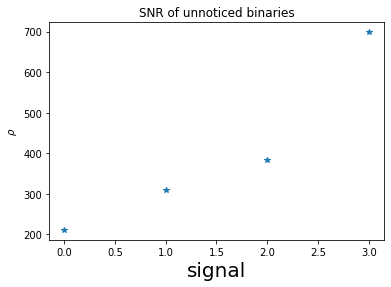

In [13]:
# Check the SNR of the missed binaries

plt.plot(np.sqrt(SNR2),'*')
plt.xlabel('signal',fontsize = 20)
plt.ylabel(r'$\rho$')
plt.title('SNR of unnoticed binaries')

In [14]:
# Numerical Derivatives - Source 1

# Chirp mass
logMchirp_delta = 1e-6
params_1_p = [logMchirp_1 + logMchirp_delta,eta_1,beta_1,Deff_1]
params_1_m = [logMchirp_1 - logMchirp_delta,eta_1,beta_1,Deff_1]

deriv_log_Mchirp_1 = (htilde_AP(freq_bin,params_1_p) - htilde_AP(freq_bin,params_1_m))/(2*logMchirp_delta)

# eta
eta_delta = 1e-6
params_1_p = [logMchirp_1,eta_1 + eta_delta,beta_1,Deff_1]
params_1_m = [logMchirp_1,eta_1 - eta_delta,beta_1,Deff_1]

deriv_log_eta_1 = (htilde_AP(freq_bin,params_1_p) - htilde_AP(freq_bin,params_1_m))/(2*eta_delta)

# beta
beta_delta = 1e-6
params_1_p = [logMchirp_1,eta_1,beta_1 + beta_delta,Deff_1]
params_1_m = [logMchirp_1,eta_1,beta_1 - beta_delta,Deff_1]

deriv_log_beta_1 = (htilde_AP(freq_bin,params_1_p) - htilde_AP(freq_bin,params_1_m))/(2*beta_delta)

# Numerical Derivatives - Source 2

# Chirp mass
logMchirp_delta = 1e-6
params_2_p = [logMchirp_2 + logMchirp_delta,eta_2,beta_2,Deff_2]
params_2_m = [logMchirp_2 - logMchirp_delta,eta_2,beta_2,Deff_2]

deriv_log_Mchirp_2 = (htilde_AP(freq_bin,params_2_p) - htilde_AP(freq_bin,params_2_m))/(2*logMchirp_delta)

# eta 
eta_delta = 1e-6
params_2_p = [logMchirp_2,eta_2 + eta_delta,beta_2,Deff_2]
params_2_m = [logMchirp_2,eta_2 - eta_delta,beta_2,Deff_2]

deriv_log_eta_2 = (htilde_AP(freq_bin,params_2_p) - htilde_AP(freq_bin,params_2_m))/(2*eta_delta)

# beta
beta_delta = 1e-6
params_2_p = [logMchirp_2,eta_2,beta_2 + beta_delta,Deff_2]
params_2_m = [logMchirp_2,eta_2,beta_2 - beta_delta,Deff_2]

deriv_log_beta_2 = (htilde_AP(freq_bin,params_2_p) - htilde_AP(freq_bin,params_2_m))/(2*beta_delta)

diff_vec = [deriv_log_Mchirp_1,deriv_log_eta_1,deriv_log_beta_1,
            deriv_log_Mchirp_2,deriv_log_eta_2,deriv_log_beta_2]


fish_mix = np.eye(N_resolved * N_params)
for i in range(0,N_resolved * N_params):
    for j in range(0,N_resolved * N_params):
        fish_mix[i,j] = inner_prod(diff_vec[i],diff_vec[j],PSD,delta_f)  # Build Joint FM
        
        

import mpmath as mp  # use arbitrary precision to invert mamtrix
mp.dps = 4000;  

fish_mix_prec = mp.matrix(fish_mix)

fish_mix_inv = fish_mix_prec**-1

Cov_Matrix = np.eye(N_resolved * N_params)
for i in range(0,N_resolved * N_params):
    for j in range(0,N_resolved * N_params):
        Cov_Matrix[i,j] = float(fish_mix_inv[i,j])

In [15]:
# MCMC

# MCMC
"""
Created on Mon Nov 25 23:53:26 2019

@author: Ollie
"""

import numpy as np
import scipy as sp
import random as rd
import matplotlib.pyplot as plt

def llike(pdgrm, variances):
    """
    Computes log (Whittle) likelihood 
    """

    return -0.5 * sum(pdgrm / variances)

def lprior_logM_chirp(logM_chirp,logM_chirp_low, logM_chirp_high):
    """
    Prior on amplitude - uniform
    """

    if logM_chirp < logM_chirp_low or logM_chirp > logM_chirp_high:
        print('rejected logM_chirp')
        return -1e100
    else:
        return 0
    
def lprior_eta(eta,eta_low, eta_high):
    """
    Prior on amplitude - uniform
    """
    if eta < eta_low or eta > eta_high:
        print('rejected eta')

        return -1e100
    else:
        return 0
    
def lprior_beta(beta,beta_low, beta_high):
    """
    Prior on amplitude - uniform
    """

    if beta < beta_low or beta > beta_high:
        print('rejected beta')
        return -1e100
    else:
        return 0

    
def lpost(pdgrm, variances,
          logM_chirp_1,logM_chirp_2, logM_chirp_low,logM_chirp_high,
          eta_1, eta_2, eta_low, eta_high,
          beta_1, beta_2, beta_low, beta_high):
    '''
    Compute log posterior
    '''
    
    return(lprior_logM_chirp(logM_chirp_1,logM_chirp_low, logM_chirp_high) +
           lprior_logM_chirp(logM_chirp_2,logM_chirp_low, logM_chirp_high) +
           lprior_eta(eta_1,eta_low, eta_high) + 
           lprior_eta(eta_2,eta_low, eta_high) +
           lprior_beta(beta_1,beta_low, beta_high) +
           lprior_beta(beta_2,beta_low, beta_high) +
           + llike(pdgrm, variances))


def accept_reject(lp_prop, lp_prev):
    '''
    Compute log acceptance probability (minimum of 0 and log acceptance rate)
    Decide whether to accept (1) or reject (0)
    '''
    u = np.random.uniform(size = 1)  # U[0, 1]
    r = np.minimum(0, lp_prop - lp_prev)  # log acceptance probability
    if np.log(u) < r:
        return(1)  # Accept
    else:
        return(0)  # Reject
    
 

def accept_rate(parameter):
    '''
    Compute acceptance rate for a specific parameter
    Used to adapt the proposal variance in a MH sampler
    Input: parameter (sequence of samples of a parameter)
    '''
    rejections = 0
    for i in range(len(parameter) - 1):  # Count rejections
        rejections = rejections + (parameter[i + 1] == parameter[i])
    reject_rate = rejections / (len(parameter) - 1)  # Rejection rate
    return(1 - reject_rate)  # Return acceptance rate
    

#####
#####
    

def MCMC_full(data_f,f, true_vals,D_vec,Cov_Matrix,
                          Variances,
                           M_chirp_high,M_chirp_low,
                           eta_high, eta_low,
                           beta_high, beta_low,
                           Ntotal, 
                           burnin, 
                           printerval = 50):

    
    np.random.seed(2) # Set the seed
    
    
    logM_chirp_1 = []   # Initialise empty vectors
    eta_1 = []
    beta_1 = []
    Deff_1 = []
    
    logM_chirp_2 = []   # Initialise empty vectors
    eta_2 = []
    beta_2 = []
    Deff_2 = []
      

    logM_chirp_1.append(true_vals[0])
    eta_1.append(true_vals[1])
    beta_1.append(true_vals[2])
    Deff_1.append(D_vec[0])
    
    logM_chirp_2.append(true_vals[3])
    eta_2.append(true_vals[4])
    beta_2.append(true_vals[5])
    Deff_2.append(D_vec[1])
    
    delta_f = f[1] - f[0]   # Extract sampling interval
    
    # Initialise parameter vectors
    
    params_1 = [logM_chirp_1[0],eta_1[0],beta_1[0],Deff_1[0]]
    params_2 = [logM_chirp_2[0],eta_2[0],beta_2[0],Deff_2[0]]
    
    signal_init_f_1 = htilde_AP(f,params_1)
    signal_init_f_2 = htilde_AP(f,params_2)
    
    signal_f_init_tot = signal_init_f_1 + signal_init_f_2  # Construct signal template, a sum of 
                                                           # two signals.

    # Compute periodogram
    pdgrm = abs(data_f - signal_f_init_tot)**2  
    print('pdgrm is',pdgrm)
                                                      
    # Initial value for log posterior
    lp = []
    lp.append(lpost(pdgrm, variances,
                    logM_chirp_1[0], logM_chirp_2[0], logM_chirp_low, logM_chirp_high,
                    eta_1[0], eta_2[0], eta_low, eta_high,
                    beta_1[0], beta_2[0], beta_low, beta_high))
    
    lp_store = lp[0]  # Create log posterior storage to be overwritten

    accept_reject_count = [0]   
    #####                                                  
    # Run MCMC
    #####
    for i in range(1, Ntotal):

        if i % printerval == 0:
            print("i = ", i)  # Iteration and Acceptance/Rejection ratio 
            print("acceptance_reject ratio", 100*sum(accept_reject_count)/len(accept_reject_count),'percent')
            

        ####

        #####
        # Step 1: Sample spin, a
        #####
        
        lp_prev = lp_store  # Call previous stored log posterior
        

        prev_vec = [logM_chirp_1[i - 1], eta_1[i - 1], beta_1[i - 1],
                   logM_chirp_2[i - 1], eta_2[i - 1], beta_2[i - 1]]
    
        
        
        prop_vec = np.random.multivariate_normal(prev_vec, (1/2)*Cov_Matrix)
        
        # Draw from multivariate Gaussian distribution with covariance matrix given by the
        # inverse of the fisher matrix.
        

        logM_chirp_prop_1 = prop_vec[0]
        eta_prop_1 = prop_vec[1]
        beta_prop_1 = prop_vec[2]
        
        logM_chirp_prop_2 = prop_vec[3]
        eta_prop_2 = prop_vec[4]
        beta_prop_2 = prop_vec[5]

        
        param_1_prop = [logM_chirp_prop_1, eta_prop_1, beta_prop_1, Deff_1[0]]
        param_2_prop = [logM_chirp_prop_2, eta_prop_2, beta_prop_2, Deff_2[0]]
        
        signal_prop_f_1  = htilde_AP(f,param_1_prop)  # New proposed signal
        signal_prop_f_2  = htilde_AP(f,param_2_prop)  # New proposed signal
        
        signal_prop_f_tot = signal_prop_f_1 + signal_prop_f_2  # New proposed signal (total)
        
        pdgrm_prop = abs(data_f - signal_prop_f_tot)**2  # Compute periodigram
        
        
        # Compute log posterior
        lp_prop = lpost(pdgrm_prop, variances, 
                         logM_chirp_prop_1,logM_chirp_prop_2,logM_chirp_low,logM_chirp_high,
                           eta_prop_1,eta_prop_2, eta_low, eta_high,
                             beta_prop_1, beta_prop_2, beta_low, beta_high) 
        

        if accept_reject(lp_prop, lp_prev) == 1:  # Accept
            logM_chirp_1.append(logM_chirp_prop_1) 
            eta_1.append(eta_prop_1)
            beta_1.append(beta_prop_1)

            logM_chirp_2.append(logM_chirp_prop_2) 
            eta_2.append(eta_prop_2)
            beta_2.append(beta_prop_2)
            
            accept_reject_count.append(1)  # Add one to counter
              
            lp_store = lp_prop  # Overwrite lp_store

        else:  # Reject
            
            logM_chirp_1.append(logM_chirp_1[i - 1]) 
            eta_1.append(eta_1[i - 1])
            beta_1.append(beta_1[i - 1])

            logM_chirp_2.append(logM_chirp_2[i - 1]) 
            eta_2.append(eta_2[i - 1])
            beta_2.append(beta_2[i - 1])
            
            accept_reject_count.append(0)  # Add 0 to counter
              
        lp.append(lp_store)  # Add log posterior value
        


        
    return logM_chirp_1,eta_1,beta_1,logM_chirp_2,eta_2,beta_2,lp

In [16]:
variances = (PSD)/(4*delta_f)   # Variances (denominator of likelihood)
np.random.seed(2)
noise_real = np.random.normal(0,np.sqrt(variances))
noise_imag = np.random.normal(0,np.sqrt(variances))

noise_f = noise_real + 1j*noise_imag  # Construct stationary noise

data_f = h_f_1 + h_f_2 + sum_unres_signal_f + noise_f  # data stream = two signals + confusion + noise



Ntotal = 100000  # Number of iterations
burnin = 0  # Do not consider burnin since we start the true parameters

# Set priors - all uniform

logM_chirp_low = -100   
logM_chirp_high = np.log(200) 

eta_low = 0
eta_high = 0.25

beta_low = 0
beta_high = 9.4


true_vals = [np.log(M_chirp_1),eta_1,beta_1,
            np.log(M_chirp_2),eta_2,beta_2] # Set true parameter vector [sampled over]

D_vec = [Deff_1,Deff_2]  # Set distances [not sampled over]

# Run the algorithm
logM_chirp_1_samps,eta_1_samps,beta_1_samps,logM_chirp_2_samps,eta_2_samps,beta_2_samps,lp = MCMC_full(data_f,
                                                   freq_bin, true_vals,D_vec,Cov_Matrix,
                                                   variances,
                                                   logM_chirp_high,logM_chirp_low,
                                                   eta_high,eta_low,
                                                   beta_high,beta_low,
                                                   Ntotal, 
                                                   burnin, 
                                                   printerval = 2000,
                                                   )


pdgrm is [1.58364311e-44 8.63266250e-44 1.56126858e-44 ... 1.76483331e-45
 1.72424585e-45 1.59129753e-45]
i =  2000
acceptance_reject ratio 40.85 percent
i =  4000
acceptance_reject ratio 40.075 percent
i =  6000
acceptance_reject ratio 40.96666666666667 percent
i =  8000
acceptance_reject ratio 41.175 percent
i =  10000
acceptance_reject ratio 41.35 percent
i =  12000
acceptance_reject ratio 41.15833333333333 percent
i =  14000
acceptance_reject ratio 41.19285714285714 percent
i =  16000
acceptance_reject ratio 41.28125 percent
i =  18000
acceptance_reject ratio 41.46666666666667 percent
i =  20000
acceptance_reject ratio 41.785 percent
i =  22000
acceptance_reject ratio 41.57272727272727 percent
i =  24000
acceptance_reject ratio 41.62916666666667 percent
i =  26000
acceptance_reject ratio 41.65769230769231 percent
i =  28000
acceptance_reject ratio 41.68214285714286 percent
i =  30000
acceptance_reject ratio 41.72666666666667 percent
i =  32000
acceptance_reject ratio 41.75 percent


In [17]:
# Here we should see that the FM predictions on the standard deviations of the parameters are 
# less than the variance of the recovered parameters found through MCMC.

# If the standard deviations from the FM are > standard deviations from MCMC run the chains for longer. 
# it's simply a statistical fluctuation. The FM provides the cramer rao bound on the variance on the 
# parameters. In english, the lowest variance attainable. 

print('MCMC logM_chirp:',np.sqrt(np.var(logM_chirp_1_samps)))
print('MCMC eta:',np.sqrt(np.var(eta_1_samps)))
print('MCMC beta:',np.sqrt(np.var(beta_1_samps)))

print('FM:',np.sqrt(np.diag(Cov_Matrix)[0:3]))

MCMC logM_chirp: 1.774265219330771e-05
MCMC eta: 9.225404415270054e-05
MCMC beta: 0.00487404158877367
FM: [1.70719781e-05 8.99963616e-05 4.76563823e-03]


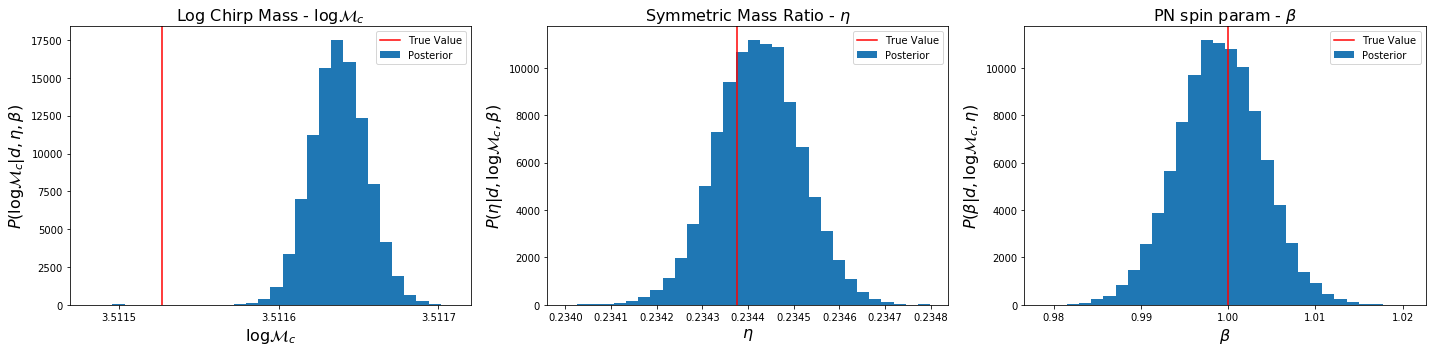

In [18]:
# Results

fig,ax = plt.subplots(1,3,figsize = (20,5))

ax[0].hist(logM_chirp_1_samps,bins = 30,label = 'Posterior')
ax[0].axvline(x = np.log(M_chirp_1),c = 'red', label = 'True Value')
# ax[0].axvline(x = a_res + a_bias, color = 'g', label = 'Predicted bias')
ax[0].set_xlabel(r'$\log \mathcal{M}_{c}$',fontsize = 16)
ax[0].set_ylabel(r'$P(\log \mathcal{M}_{c}|d,\eta,\beta)$',fontsize = 16)
ax[0].set_title(r'Log Chirp Mass - $\log \mathcal{M}_{c}$',fontsize = 16)
# plt.xlim([1.794,1.803])
ax[0].locator_params(axis='x', nbins=5)
ax[0].legend()
# ax[0].show()



ax[1].hist(eta_1_samps,bins = 30,label = 'Posterior')
ax[1].axvline(x = eta_1,c = 'red', label = 'True Value')
# ax[1].axvline(x = f_res + f0_bias, color = 'g', label = 'Predicted bias')
ax[1].set_xlabel(r'$\eta$',fontsize = 16)
ax[1].set_ylabel(r'$P(\eta|d,\log \mathcal{M}_{c},\beta)$',fontsize = 16)
ax[1].set_title(r'Symmetric Mass Ratio - $\eta$',fontsize = 16)
# plt.xlim([1.794,1.803])
ax[1].legend()
# ax[1].show()


ax[2].hist(beta_1_samps,bins = 30,label = 'Posterior')
ax[2].axvline(x = beta_1,c = 'red', label = 'True Value')
# ax[2].axvline(x = phi_res + phi_bias,c = 'g',label = 'Predicted bias' )
ax[2].set_xlabel(r'$\beta$',fontsize = 16)
ax[2].set_ylabel(r'$P(\beta|d,\log \mathcal{M}_{c},\eta)$',fontsize = 16)
ax[2].set_title(r'PN spin param - $\beta$',fontsize = 16)
ax[2].legend()
# ax[2].show()
plt.tight_layout()

In [19]:
# FM formalism

deltaH = sum_unres_signal_f   # Unresolved (missed) signals

waveform_errors = (htilde_GR(freq_bin,eps_GR,pars_1) - htilde_AP(freq_bin,pars_1) + 
                   htilde_GR(freq_bin,eps_GR,pars_2) - htilde_AP(freq_bin,pars_2)) # Waveform Errors


deltah = waveform_errors + deltaH + noise_f  # Total error on parameters

b_vec_n = [inner_prod(diff_vec[i],noise_f,PSD,delta_f) for i in range(0,6)]  # Noise 
b_vec_waveform_errors = [inner_prod(diff_vec[i],waveform_errors,PSD,delta_f) for i in range(0,6)] # Waveform errors
b_vec_unresolved_signals = [inner_prod(diff_vec[i],deltaH,PSD,delta_f) for i in range(0,6)] # unresolved signal error


biases_pred_n = np.matmul(Cov_Matrix,b_vec_n)   # Statistical fluctuations from true parameters : noise
biases_pred_waveform_errors = np.matmul(Cov_Matrix,b_vec_waveform_errors)  # Waveform error bias
biases_pred_unresolved = np.matmul(Cov_Matrix,b_vec_unresolved_signals)  # Unresolved signal bias

biases_pred_unresolved_total = biases_pred_n + biases_pred_waveform_errors + biases_pred_unresolved # Total bias

In [20]:
# Store biases on parameters for source 1.

M_chirp_bias_1 = biases_pred_unresolved_total[0]
eta_bias_1 = biases_pred_unresolved_total[1]
beta_bias_1 = biases_pred_unresolved_total[2]

In [21]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

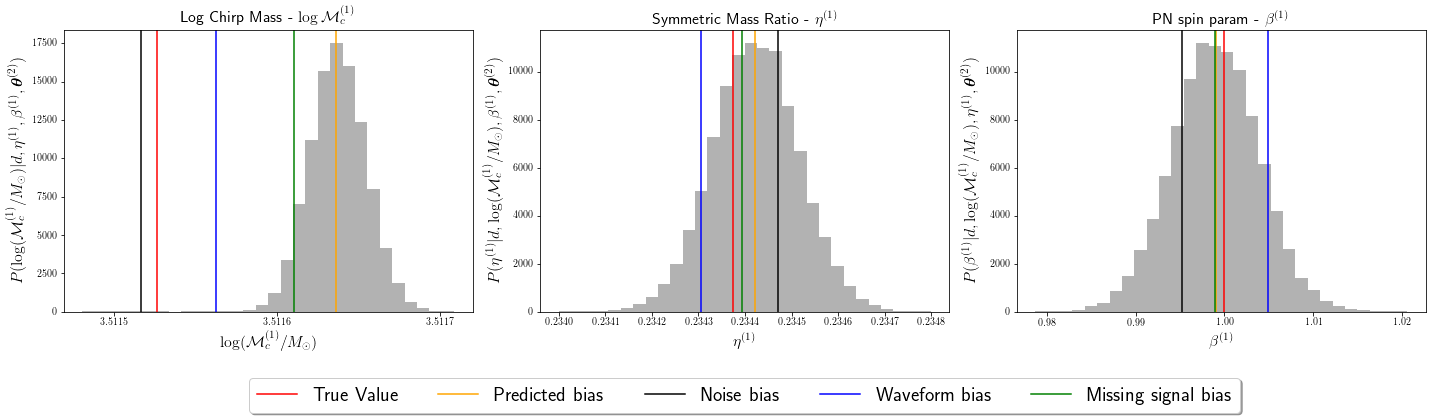

In [23]:
# Results

fig,ax = plt.subplots(1,3,figsize = (20,6))

ax[0].hist(logM_chirp_1_samps,bins = 30,color = 'black', histtype = 'stepfilled', alpha = 0.3)
ax[0].axvline(x = np.log(M_chirp_1),c = 'red', label = 'True Value')
ax[0].axvline(x = np.log(M_chirp_1) + M_chirp_bias_1, color = 'orange', label = 'Predicted bias')
ax[0].axvline(x = np.log(M_chirp_1) + biases_pred_n[0],c = 'black',label = 'Noise bias' )
ax[0].axvline(x = np.log(M_chirp_1) + biases_pred_waveform_errors[0],c = 'blue',label = 'Waveform bias' )
ax[0].axvline(x = np.log(M_chirp_1) + biases_pred_unresolved[0],c = 'green',label = 'Missing  signal bias' )
ax[0].set_xlabel(r'$\log (\mathcal{M}^{(1)}_{c}/M_{\odot})$',fontsize = 16)
ax[0].set_ylabel(r'$P(\log (\mathcal{M}^{(1)}_{c}/M_{\odot})|d,\eta^{(1)},\beta^{(1)},\boldsymbol{\theta}^{(2)})$',fontsize = 16)
ax[0].set_title(r'Log Chirp Mass - $\log \mathcal{M}^{(1)}_{c}$',fontsize = 16)
ax[0].locator_params(axis='x', nbins=5)



ax[1].hist(eta_1_samps,bins = 30,color = 'black', histtype = 'stepfilled', alpha = 0.3)
ax[1].axvline(x = eta_1,c = 'red', label = 'True Value')
ax[1].axvline(x = eta_1 + eta_bias_1, color = 'orange', label = 'Predicted bias')
ax[1].axvline(x = eta_1 + biases_pred_n[1],c = 'black',label = 'Noise bias' )
ax[1].axvline(x = eta_1 + biases_pred_waveform_errors[1],c = 'blue',label = 'Waveform bias' )
ax[1].axvline(x = eta_1 + biases_pred_unresolved[1],c = 'green',label = 'Missing signal bias' )
ax[1].set_xlabel(r'$\eta^{(1)}$',fontsize = 16)
ax[1].set_ylabel(r'$P(\eta^{(1)}|d,\log (\mathcal{M}^{(1)}_{c}/M_{\odot}),\beta^{(1)},\boldsymbol{\theta}^{(2)})$',fontsize = 16)
ax[1].set_title(r'Symmetric Mass Ratio - $\eta^{(1)}$',fontsize = 16)

ax[2].hist(beta_1_samps,bins = 30,color = 'black', histtype = 'stepfilled', alpha = 0.3)
ax[2].axvline(x = beta_1,c = 'red', label = 'True Value')
ax[2].axvline(x = beta_1 + beta_bias_1,c = 'orange',label = 'Predicted bias' )
ax[2].axvline(x = beta_1 + biases_pred_n[2],c = 'black',label = 'Noise bias' )
ax[2].axvline(x = beta_1 + biases_pred_waveform_errors[2],c = 'blue',label = 'Waveform bias' )
ax[2].axvline(x = beta_1 + biases_pred_unresolved[2],c = 'green',label = 'Missing signal bias' )
ax[2].set_xlabel(r'$\beta^{(1)}$',fontsize = 16)
ax[2].set_ylabel(r'$P(\beta^{(1)}|d,\log (\mathcal{M}^{(1)}_{c}/M_{\odot}),\eta^{(1)},\boldsymbol{\theta}^{(2)})$',fontsize = 16)
ax[2].set_title(r'PN spin param - $\beta^{(1)}$',fontsize = 16)
# ax[2].legend()
# ax[2].show()
plt.tight_layout()
box = ax[1].get_position()
# ax[1].set_position([box.x0, box.y0 + box.height * 0.1,
#                  box.width, box.height * 0.9])

# Put a legend below current axis
ax[1].legend(fontsize = 20, loc='upper center', bbox_to_anchor=(0.5, -0.20),
          fancybox=True, shadow=True, ncol=5)

fig.subplots_adjust(bottom=0.27)

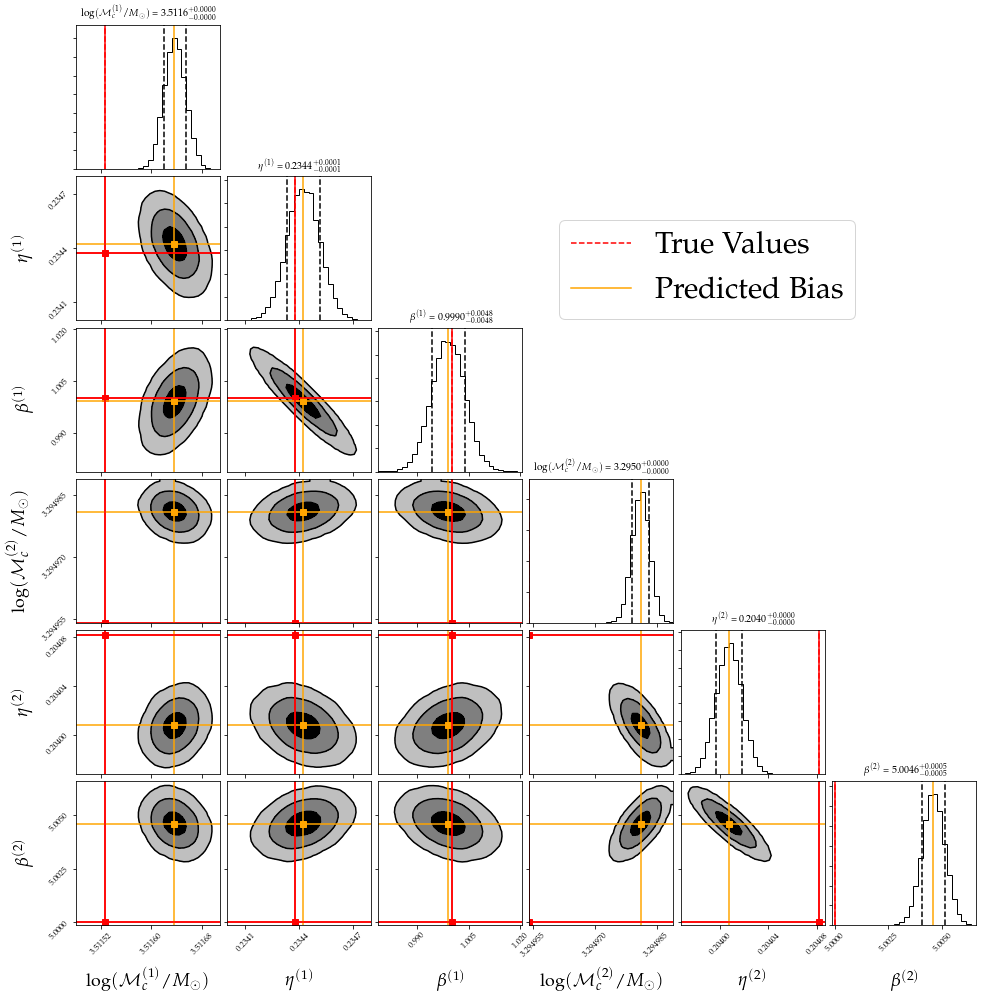

In [25]:
# Corner plot

plt.rcParams.update({'text.usetex': True,'font.family': 'serif', 'font.serif': ['Palatino'],'font.size':12})

import matplotlib as mpl
import matplotlib.patches as mpatches
import corner
# mpl.rcParams[‘axes.formatter.useoffset’] = False
CORNER_KWARGS = dict(
    smooth=0.99, # smooths out contours.
    plot_datapoints=False, # choose if you want datapoints
    label_kwargs=dict(fontsize=18), # font size for labels
    show_titles=True, #choose if you want titles on top of densities.
    title_kwargs=dict(fontsize=10), # font size for title
    plot_density=False,
    quantiles=[0.16, 0.84],  # add quantiles to plot densities.
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    fill_contours=True, #decide if you want to fill the contours
    max_n_ticks=3, # set a limit to ticks in the x-y axes.
    title_fmt='.4f', # format for high powers (here 10^2 ~ e+02 etc.)
    reverse=False  # if you are a madman, reverse the whole contour.
)

labels =[r"$\log (\mathcal{M}^{(1)}_{c}/M_{\odot})$", r"$\eta^{(1)}$", r"$\beta^{(1)}$",
          r"$\log (\mathcal{M}^{(2)}_{c}/M_{\odot})$", r"$\eta^{(2)}$", r"$\beta^{(2)}$"]
true_vals = [np.log(M_chirp_1),eta_1,beta_1,
             np.log(M_chirp_2),eta_2,beta_2]

samples = np.column_stack([logM_chirp_1_samps,eta_1_samps,beta_1_samps,
                          logM_chirp_2_samps,eta_2_samps,beta_2_samps])

fig = corner.corner(samples, bins=30,labels=labels,
                    truths=true_vals, 
                    truth_color="red",
                    color="black",**CORNER_KWARGS)
red_patch = mpatches.Patch(color="red", label="True values")

axes = np.array(fig.axes).reshape((6,6))

for i in range(6):
    ax = axes[i, i]
    ax.axvline(true_vals[i], color="red",linestyle = "--",label = 'True Values')
    ax.axvline(true_vals[i] + biases_pred_unresolved_total[i] , color="orange",label = 'Predicted Bias')
    
for yi in range(6):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(true_vals[xi] + biases_pred_unresolved_total[xi] , color="orange")
        ax.axhline(true_vals[yi] + biases_pred_unresolved_total[yi] , color="orange")
        ax.plot(true_vals[xi] + biases_pred_unresolved_total[xi] , true_vals[yi] + biases_pred_unresolved_total[yi],
                color="orange",marker='s')
        ax.axhline(true_vals[yi], color="red")
        ax.axvline(true_vals[xi],color= "red")

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=8)
        
plt.legend(fontsize = 30,bbox_to_anchor=(-2., 5),
           loc="upper left")
